# t-SNE

In [1]:
import import_ipynb
import utils
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
# préparation des données pour l'entrainement de 1992 - 2020
data_pop = utils.generate_df_from_files("./data_cleaned/population", "_population")
data_fertility = utils.generate_df_from_files("./data_cleaned/fertility", "_fertility")
data_child = utils.generate_df_from_files("./data_cleaned/child_mortality", "_child_mortality")
data_capita = utils.generate_df_from_files("./data_cleaned/gdp_capita", "_gdp_capita")
data_climat = utils.generate_df_from_files("./", "climate_cleaned")[0]


In [37]:
data_pop[11]

country      1992
0       Albania  0.002779
1       Algeria  0.022542
2        Angola  0.010508
3     Argentina  0.028559
4       Armenia  0.003025
..          ...       ...
138  Uzbekistan  0.018220
139   Venezuela  0.017626
140     Vietnam  0.057881
141      Zambia  0.006932
142    Zimbabwe  0.009067

[143 rows x 2 columns]

In [75]:
#years = [1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020] #19
years = [1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020] # 8

In [76]:
# Labels des pays
countries = data_pop[11]["country"].values

In [77]:
# nombre de pays
len(countries)

143

In [78]:
data_medals = pd.read_csv("./second_part_countries_cleaned_no_normalized.csv")

In [79]:
data_medals = data_medals.T

In [80]:
data_medals.columns = years

In [81]:
data_medals['country'] = data_medals.index

In [82]:
data_medals.reset_index(drop=True, inplace=True)


In [83]:
data_medals = data_medals.drop(data_medals.index[-1])

In [84]:
# Réorganiser le DataFrame : passer les années en une seule colonne 'year'
data_medals_long = pd.melt(data_medals, id_vars=['country'], var_name='year', value_name='medals')


In [85]:
data_medals_long

country  year  medals
0        Albania  1992     1.0
1        Algeria  1992    14.0
2         Angola  1992     1.0
3      Argentina  1992    12.0
4        Armenia  1992     0.0
...          ...   ...     ...
1139  Uzbekistan  2020    29.0
1140   Venezuela  2020     7.0
1141     Vietnam  2020     2.0
1142      Zambia  2020     4.0
1143    Zimbabwe  2020     0.0

[1144 rows x 3 columns]

In [86]:
data_medals

1992  1996  2000  2004  2008  2012  2016  2020     country
0     1.0   0.0   1.0   0.0   2.0   3.0   2.0   2.0     Albania
1    14.0  11.0  11.0  11.0  11.0   6.0  13.0   9.0     Algeria
2     1.0   1.0   1.0   1.0   0.0   2.0   2.0   1.0      Angola
3    12.0  18.0  20.0  17.0  12.0  16.0  19.0  17.0   Argentina
4     0.0  17.0   7.0   9.0  11.0   7.0  13.0   9.0     Armenia
..    ...   ...   ...   ...   ...   ...   ...   ...         ...
138   0.0  16.0  18.0  16.0  16.0  19.0  25.0  29.0  Uzbekistan
139   5.0   6.0   9.0   9.0  12.0  14.0  13.0   7.0   Venezuela
140   0.0   0.0   0.0   1.0   2.0   5.0   5.0   2.0     Vietnam
141   3.0   4.0   1.0   1.0   0.0   0.0   1.0   4.0      Zambia
142   0.0   1.0   1.0   4.0   6.0   3.0   1.0   0.0    Zimbabwe

[143 rows x 9 columns]

In [87]:
# Changer le nom de la colonne 2021(JO-2020) par 2020
data_pop[18] = data_pop[18].rename(columns={"2021(JO-2020)": "2020"})
data_fertility[18] = data_fertility[18].rename(columns={"2021(JO-2020)": "2020"})
data_child[18] = data_child[18].rename(columns={"2021(JO-2020)": "2020"})
data_capita[18] = data_capita[18].rename(columns={"2021(JO-2020)": "2020"})


In [94]:
# Initialiser une liste pour stocker toutes les années de données combinées
final_data = []

# Parcourir chaque année pour combiner les données
for i, year in enumerate(years):

    j = i + 11 # 1992 est le 11ème élément de la liste des années jusqu'à 2020

    # Vérifier si l'année existe dans les colonnes des DataFrames
    year_str = str(year)  # Utiliser le format chaîne pour être sûr
    
    if year_str not in data_pop[j].columns:
        print(f"⚠️ L'année {year} n'existe pas dans le DataFrame data_pop[{j}]. Colonnes disponibles : {data_pop[j].columns}")
        continue

    # Récupérer les colonnes pertinentes pour chaque dataset
    pop_df = data_pop[j][["country", year_str]].rename(columns={year_str: "pop"})
    fertility_df = data_fertility[j][["country", year_str]].rename(columns={year_str: "fertility"})
    child_df = data_child[j][["country", year_str]].rename(columns={year_str: "child"})
    capita_df = data_capita[j][["country", year_str]].rename(columns={year_str: "capita"})

    # Joindre les DataFrames sur "country"
    merged_df = pd.DataFrame({"country": countries})
    merged_df = merged_df.merge(pop_df, on="country", how="left")
    merged_df = merged_df.merge(fertility_df, on="country", how="left")
    merged_df = merged_df.merge(child_df, on="country", how="left")
    merged_df = merged_df.merge(capita_df, on="country", how="left")

    # Ajouter l'année dans le DataFrame
    merged_df["year"] = year

    # Réordonner les colonnes pour mettre "year" avant "country"
    cols = ["year"] + [col for col in merged_df.columns if col != "year"]
    merged_df = merged_df[cols]

    # Ajouter les données climatiques (fixes pour chaque pays)
    merged_df = merged_df.merge(data_climat, on="country", how="left")

    # Ajouter au DataFrame final
    final_data.append(merged_df)

# Concaténer toutes les années en un seul DataFrame
final_df = pd.concat(final_data, ignore_index=True)

# Rajouter les médailles
final_df["medals"] = data_medals_long["medals"]

# Remplir les valeurs manquantes par 0 pour éviter les NaN dans t-SNE
final_df = final_df.fillna(0)

# Afficher un aperçu
print(final_df.head())

# Créer un array numpy pour t-SNE avec les colonnes pertinentes
X = final_df[['pop', 'fertility', 'child', 'capita', 'Avg_Temperature', 'Avg_Precipitation', 'Avg_Seasonality', 'Avg_Aridity']].values
y = data_medals_long['medals'].values  # Médailles pour la couleur
countries_name = final_df['country'].values  # Noms des pays pour annotations

   year    country       pop  fertility     child    capita  Avg_Temperature  \
0  1992    Albania  0.002779   0.259972  0.102065  0.025418         0.550000   
1  1992    Algeria  0.022542   0.449794  0.133229  0.064224         0.500000   
2  1992     Angola  0.010508   0.844567  0.707830  0.030393         0.516667   
3  1992  Argentina  0.028559   0.273728  0.069277  0.137042         0.423077   
4  1992    Armenia  0.003025   0.206327  0.126412  0.024514         0.480000   

   Avg_Precipitation  Avg_Seasonality  Avg_Aridity  medals  
0           0.600000         0.475000     0.450000     1.0  
1           0.360000         0.240000     0.640000    14.0  
2           0.483333         0.333333     0.500000     1.0  
3           0.469231         0.338462     0.453846    12.0  
4           0.460000         0.420000     0.440000     0.0  


## La perplexité est un hyperparamètre du t-SNE qui contrôle le nombre d'échantillons voisins considérés pour chaque point.

In [95]:
X.shape

(1144, 8)

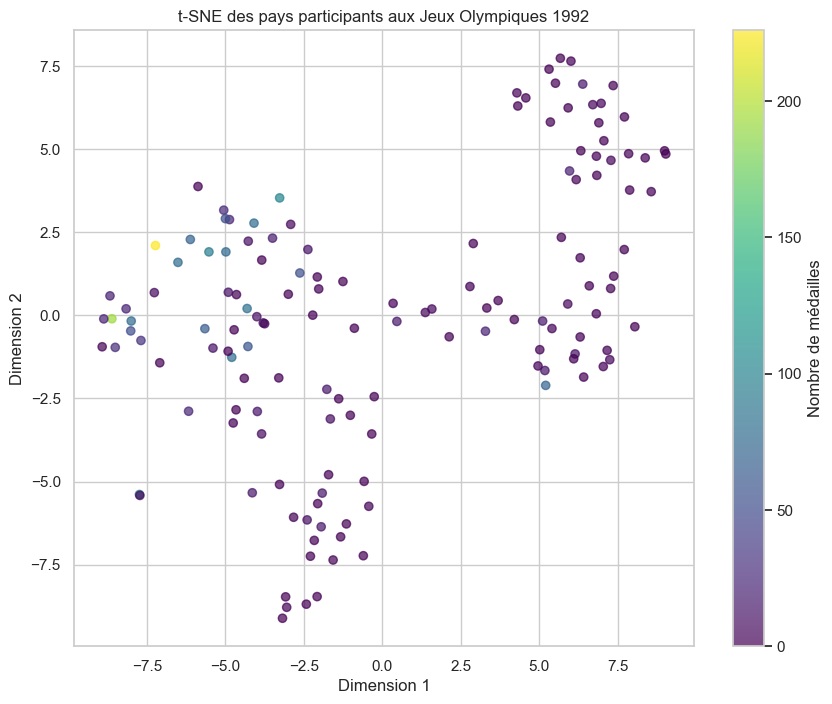

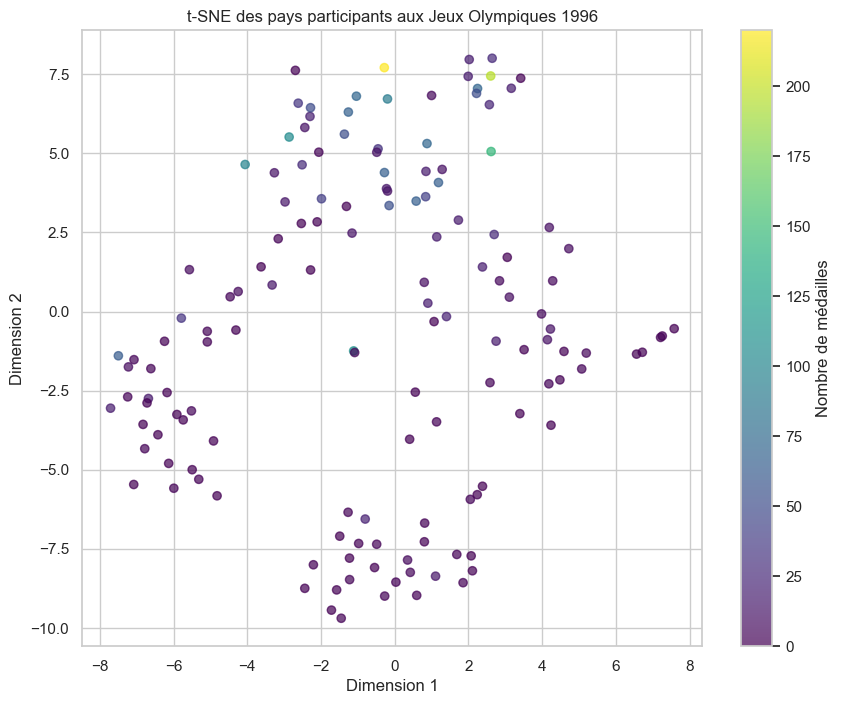

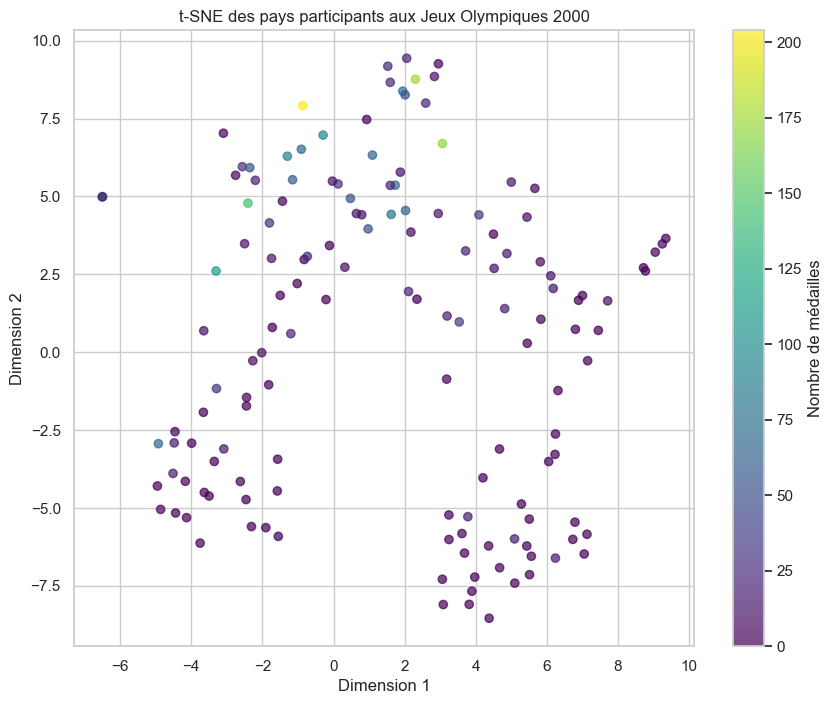

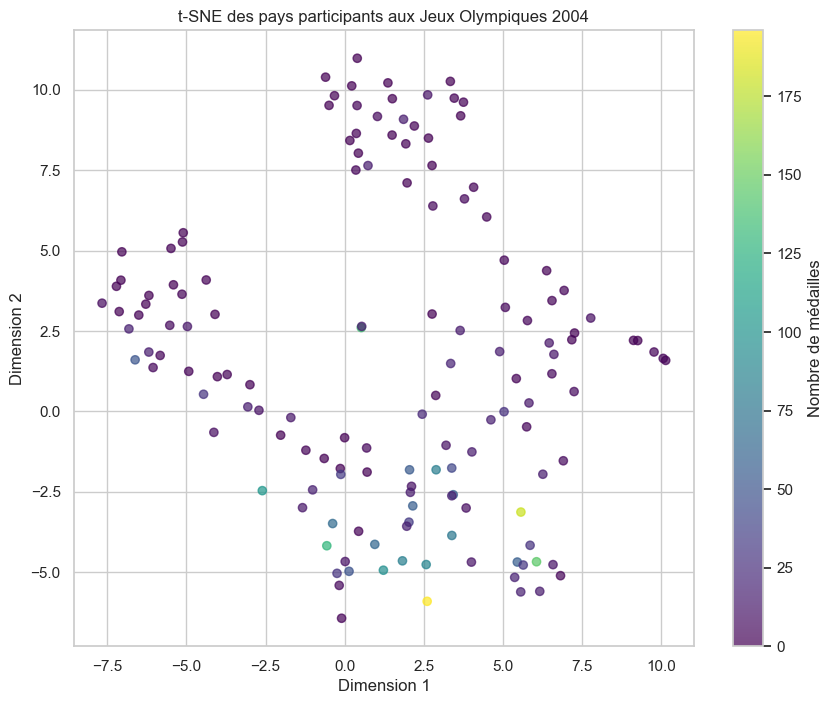

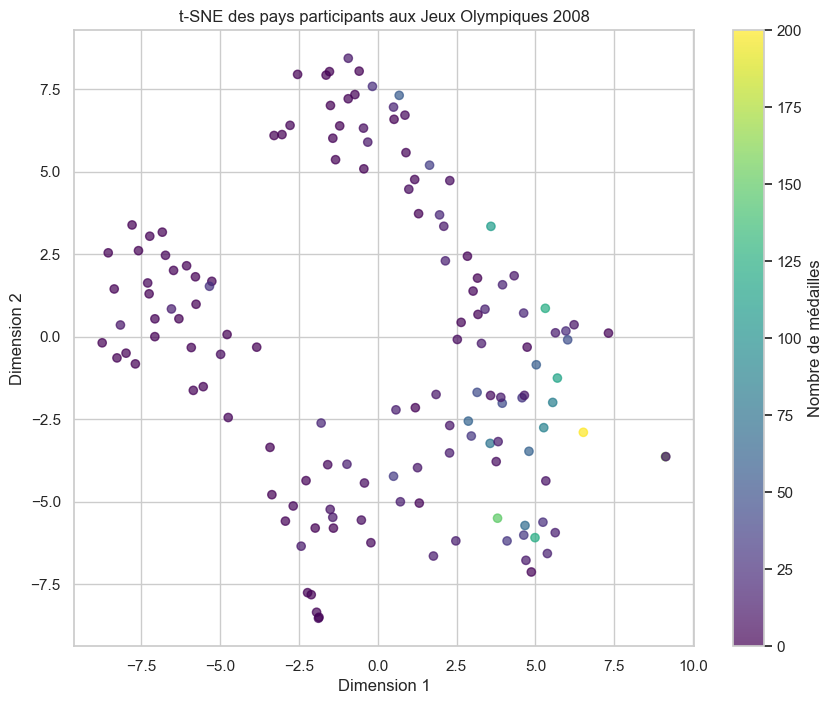

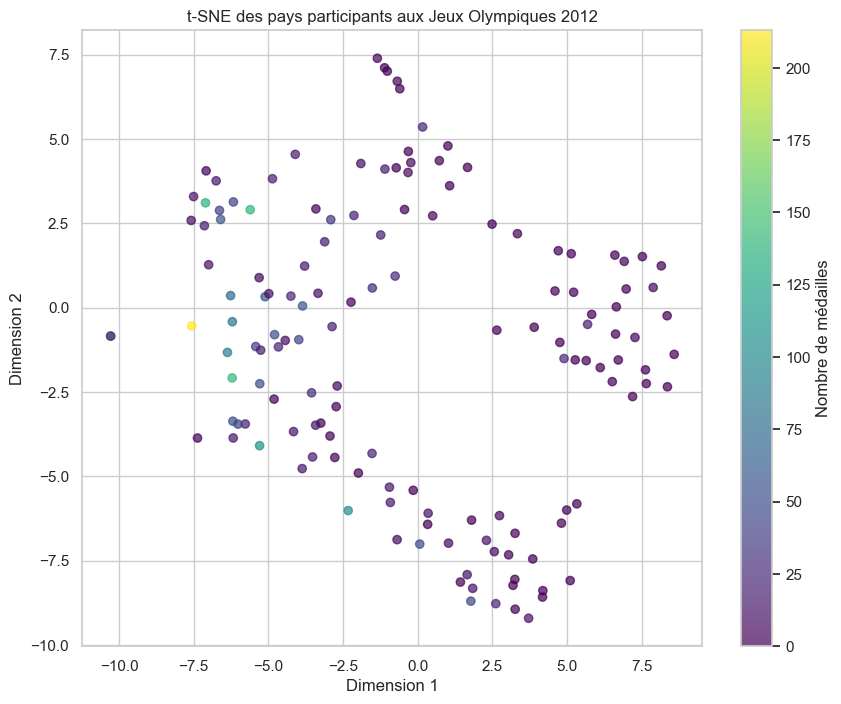

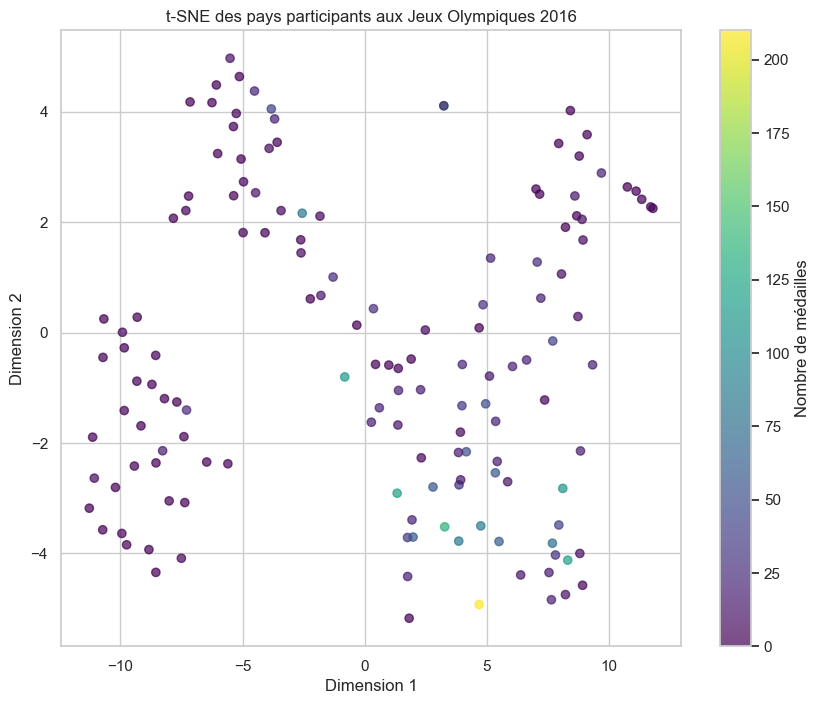

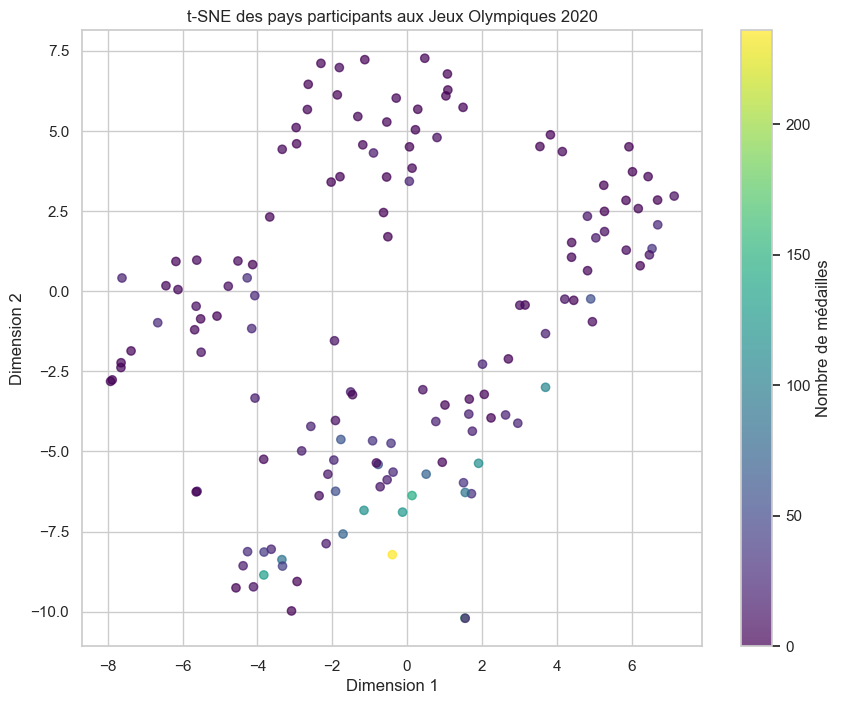

In [105]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Palette de couleurs pour une meilleure visibilité
sns.set(style="whitegrid")

# Initialisation de t-SNE (réutilisé pour toutes les années)
tsne = TSNE(n_components=2, perplexity=30, random_state=0)

# Nombre de pays par année
n_countries_per_year = 143

# Boucle sur les années
for i in range(0, len(X), n_countries_per_year):
    X_slice = X[i:i + n_countries_per_year]  # Sélection des données pour l'année en cours
    X_tsne = tsne.fit_transform(X_slice)

    # Index de l'année correspondante
    index_year = i // n_countries_per_year
    year = years[index_year]

    # Visualisation
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data_medals_long["medals"][i:i + n_countries_per_year], cmap='viridis', alpha=0.7)
    plt.title(f"t-SNE des pays participants aux Jeux Olympiques {year}")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.colorbar(scatter, label="Nombre de médailles")
    plt.show()


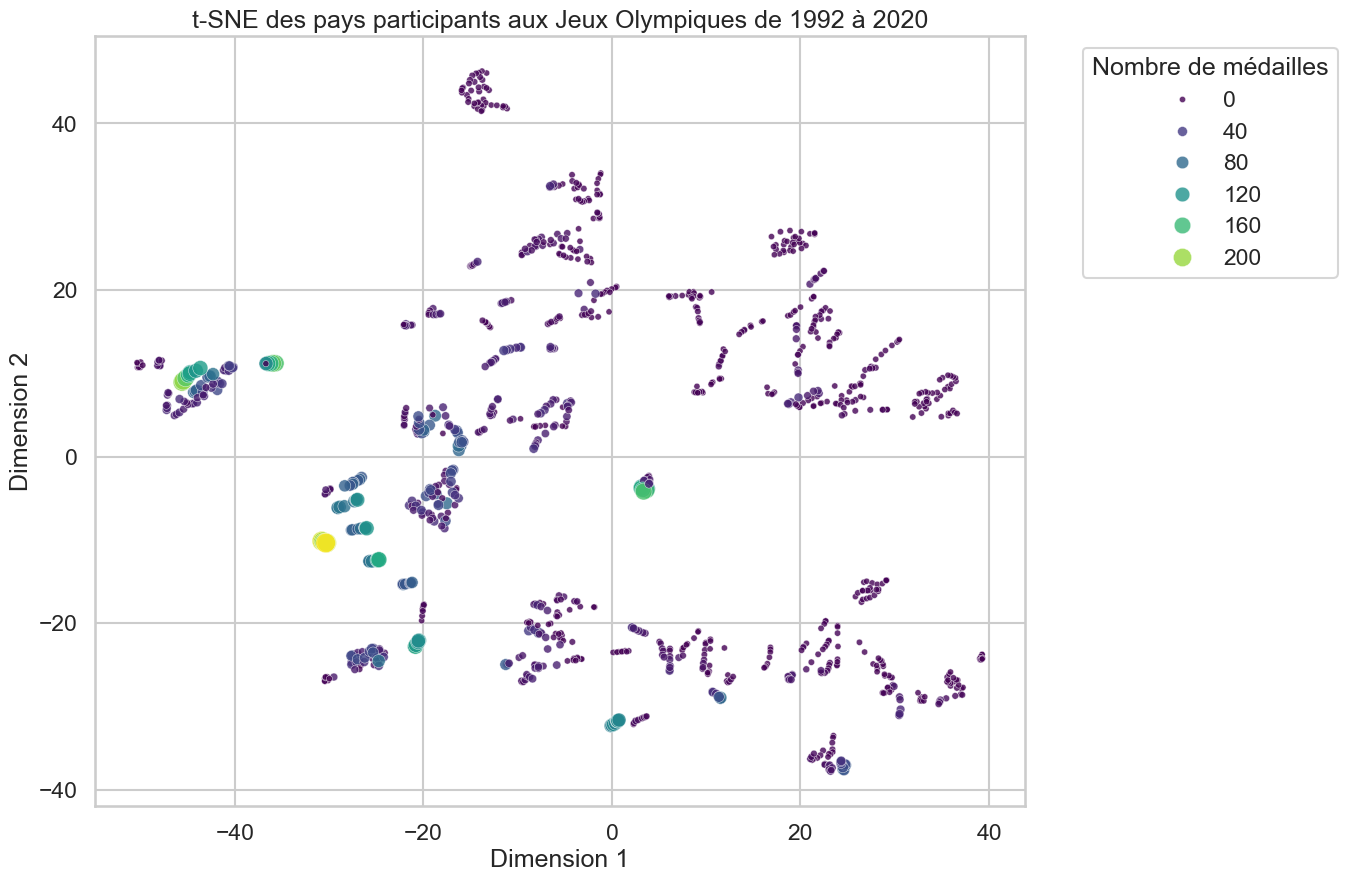

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Initialisation de t-SNE pour réduire à 2 dimensions
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
X_tsne = tsne.fit_transform(X)

# Créer un DataFrame temporaire pour lier les résultats t-SNE aux données
visualization_df = data_medals_long.copy()
visualization_df["TSNE1"] = X_tsne[:, 0]
visualization_df["TSNE2"] = X_tsne[:, 1]

# Palette de couleurs pour améliorer la lisibilité
sns.set(style="whitegrid", context="talk")

# Visualisation
plt.figure(figsize=(12, 10))
sns.scatterplot(
    x="TSNE1", y="TSNE2", hue="medals", palette="viridis", alpha=0.8, data=visualization_df, size="medals", sizes=(20, 200)
)
plt.title("t-SNE des pays participants aux Jeux Olympiques de 1992 à 2020")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend(title="Nombre de médailles", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [106]:
import plotly.express as px
from sklearn.manifold import TSNE

# Initialisation de t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=0)

# Nombre de pays par année
n_countries_per_year = 143

# Boucle sur les années
for i in range(0, len(X), n_countries_per_year):
    X_slice = X[i:i + n_countries_per_year]  # Données de l'année en cours
    X_tsne_2d = tsne.fit_transform(X_slice)  # Réduction t-SNE

    # Ajout des composantes t-SNE dans un DataFrame temporaire
    year_df = final_df.iloc[i:i + n_countries_per_year].copy()
    year_df["TSNE1"] = X_tsne_2d[:, 0]
    year_df["TSNE2"] = X_tsne_2d[:, 1]

    # Index de l'année
    index_year = i // n_countries_per_year
    year = years[index_year]

    # Visualisation interactive pour chaque année
    fig = px.scatter(
        year_df,
        x="TSNE1",
        y="TSNE2",
        color="medals",  # Coloration par nombre de médailles
        hover_name="country",  # Affichage du nom du pays au survol
        title=f"t-SNE 2D des pays aux Jeux Olympiques {year}",
        labels={"TSNE1": "Composante t-SNE 1", "TSNE2": "Composante t-SNE 2"},
        color_continuous_scale="viridis",  # Carte de couleurs
        opacity=0.7
    )

    # Affichage interactif pour chaque année
    fig.show()



In [107]:
import plotly.express as px
from sklearn.manifold import TSNE

# Appliquer t-SNE pour réduire à 2 dimensions
tsne = TSNE(n_components=2, perplexity=100, random_state=42)
X_tsne_2d = tsne.fit_transform(X)

# Ajouter les composantes t-SNE et les noms des pays au DataFrame
final_df["TSNE1"] = X_tsne_2d[:, 0]
final_df["TSNE2"] = X_tsne_2d[:, 1]

# Visualisation interactive en 2D avec Plotly
fig = px.scatter(
    final_df,
    x="TSNE1",
    y="TSNE2",
    color="medals",  # Coloration par année
    hover_name="country",  # Affiche le nom du pays au survol
    title="Visualisation t-SNE 2D des pays participants aux Jeux Olympiques",
    labels={"TSNE1": "Composante t-SNE 1", "TSNE2": "Composante t-SNE 2"},
    color_continuous_scale="viridis",  # Palette de couleurs
    opacity=0.7  # Transparence des points
)

# Afficher les noms des pays directement sur les points
fig.update_traces(textposition='top center', marker=dict(size=8))

# Affichage interactif
fig.show()


# PCA 

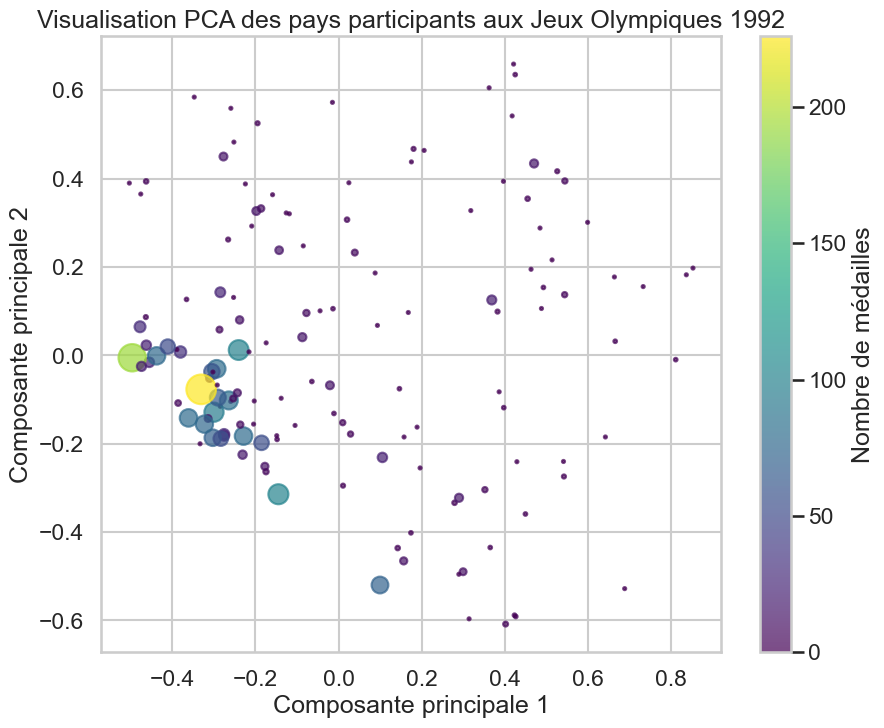

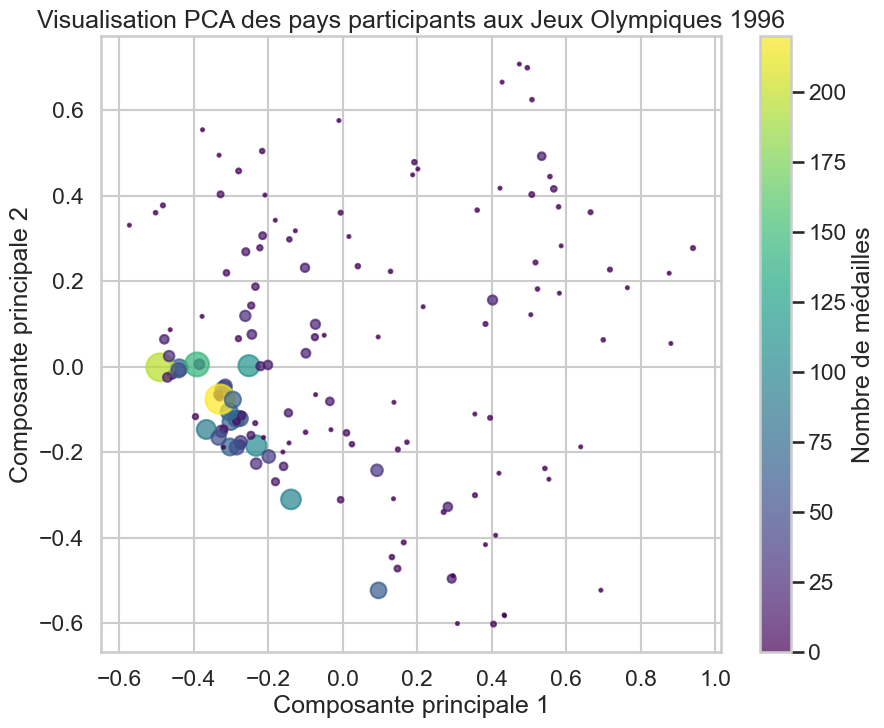

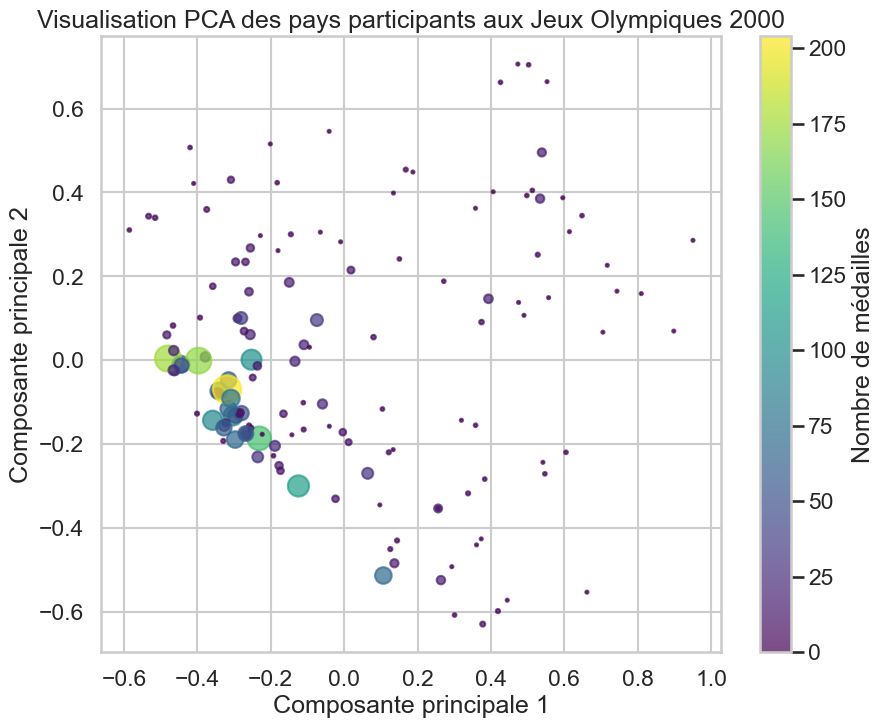

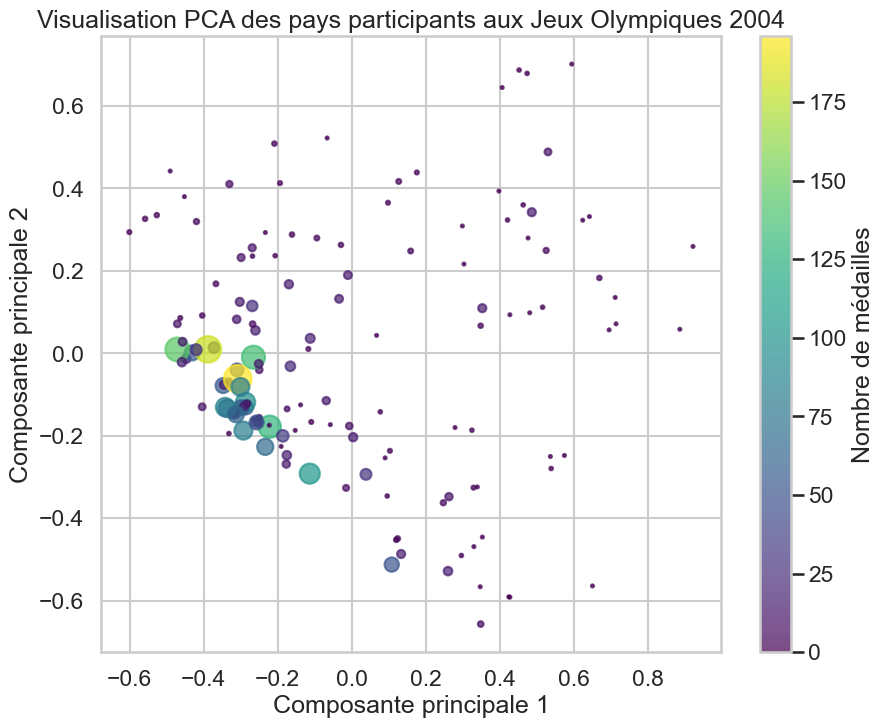

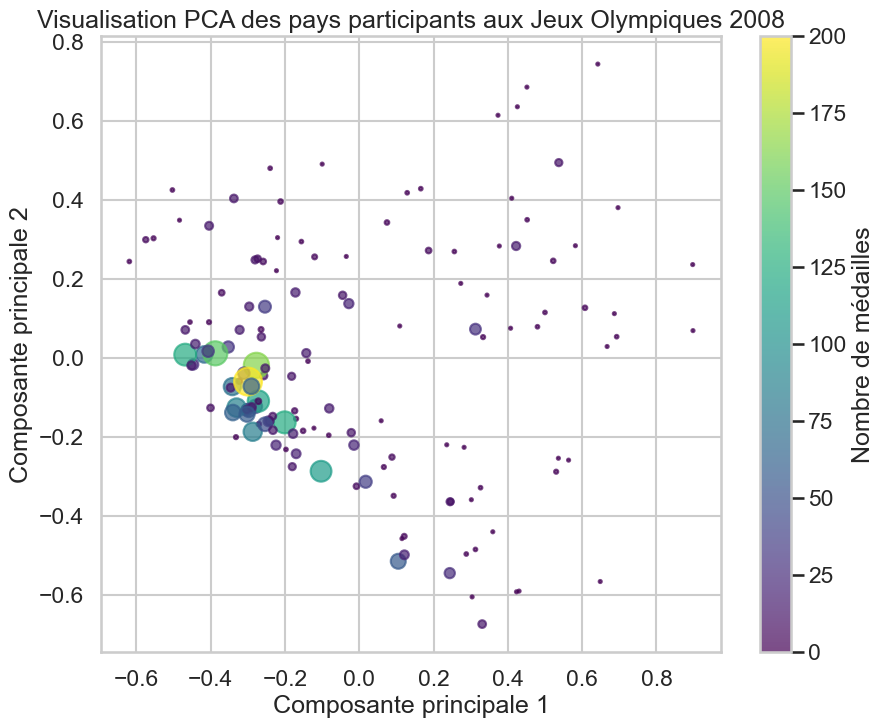

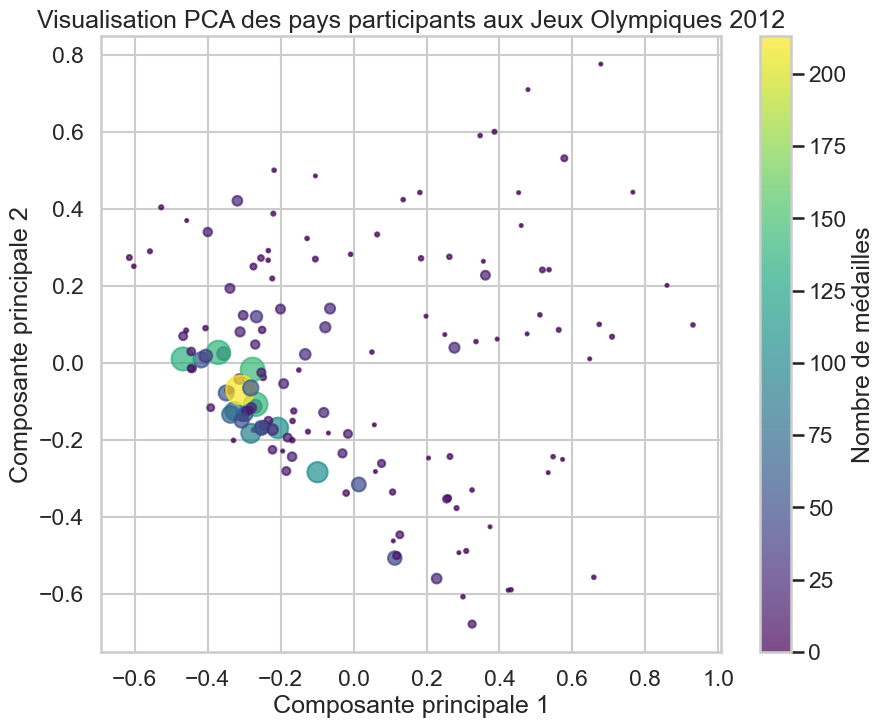

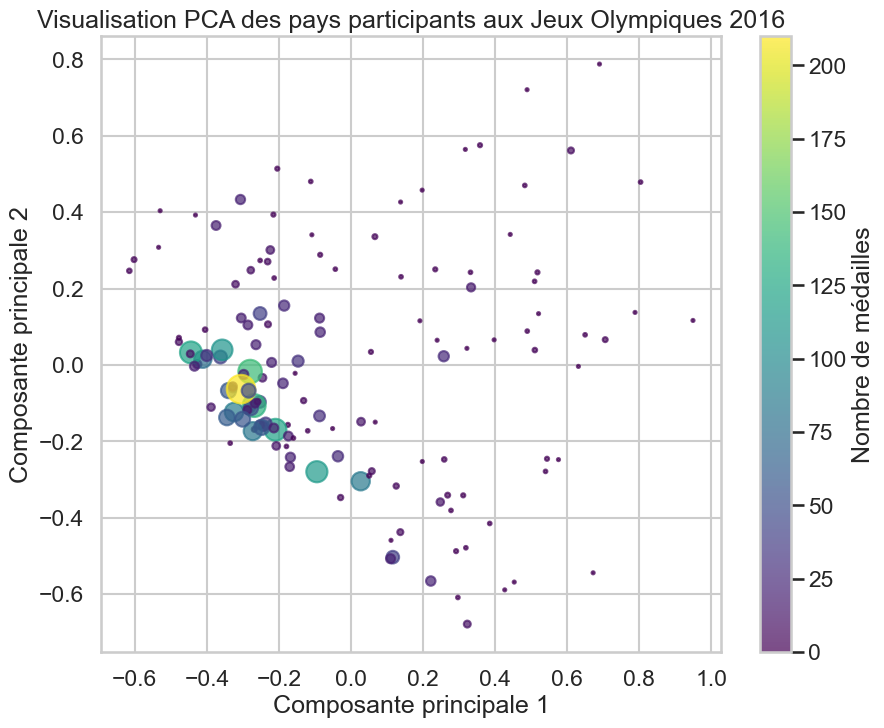

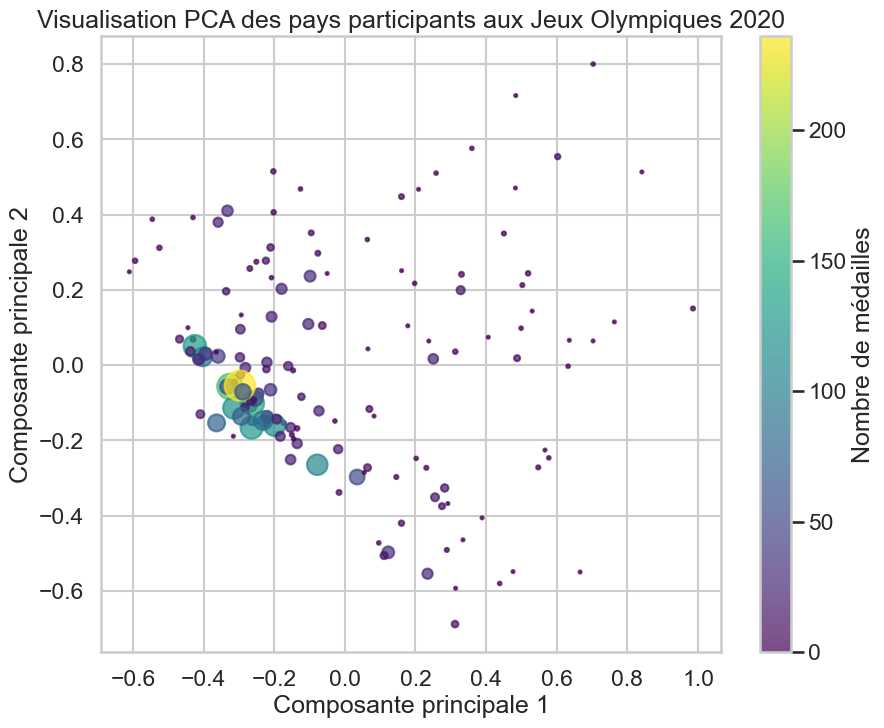

In [125]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Appliquer PCA pour réduire à 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Ajouter les composantes PCA au DataFrame
final_df["PCA1"] = X_pca[:, 0]
final_df["PCA2"] = X_pca[:, 1]

# Affichage séparé par année
unique_years = final_df["year"].unique()

for year in unique_years:
    # Filtrer les données pour l'année en cours
    year_df = final_df[final_df["year"] == year]

    # Visualisation pour l'année en cours
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(
        year_df["PCA1"],
        year_df["PCA2"],
        c=year_df["medals"],
        cmap='viridis',
        alpha=0.7,
        s=year_df["medals"] * 2 + 5  # Taille des points proportionnelle aux médailles (évite les points trop petits)
    )
    plt.title(f"Visualisation PCA des pays participants aux Jeux Olympiques {year}")
    plt.xlabel("Composante principale 1")
    plt.ylabel("Composante principale 2")
    cbar = plt.colorbar(scatter)
    cbar.set_label("Nombre de médailles")
    plt.show()


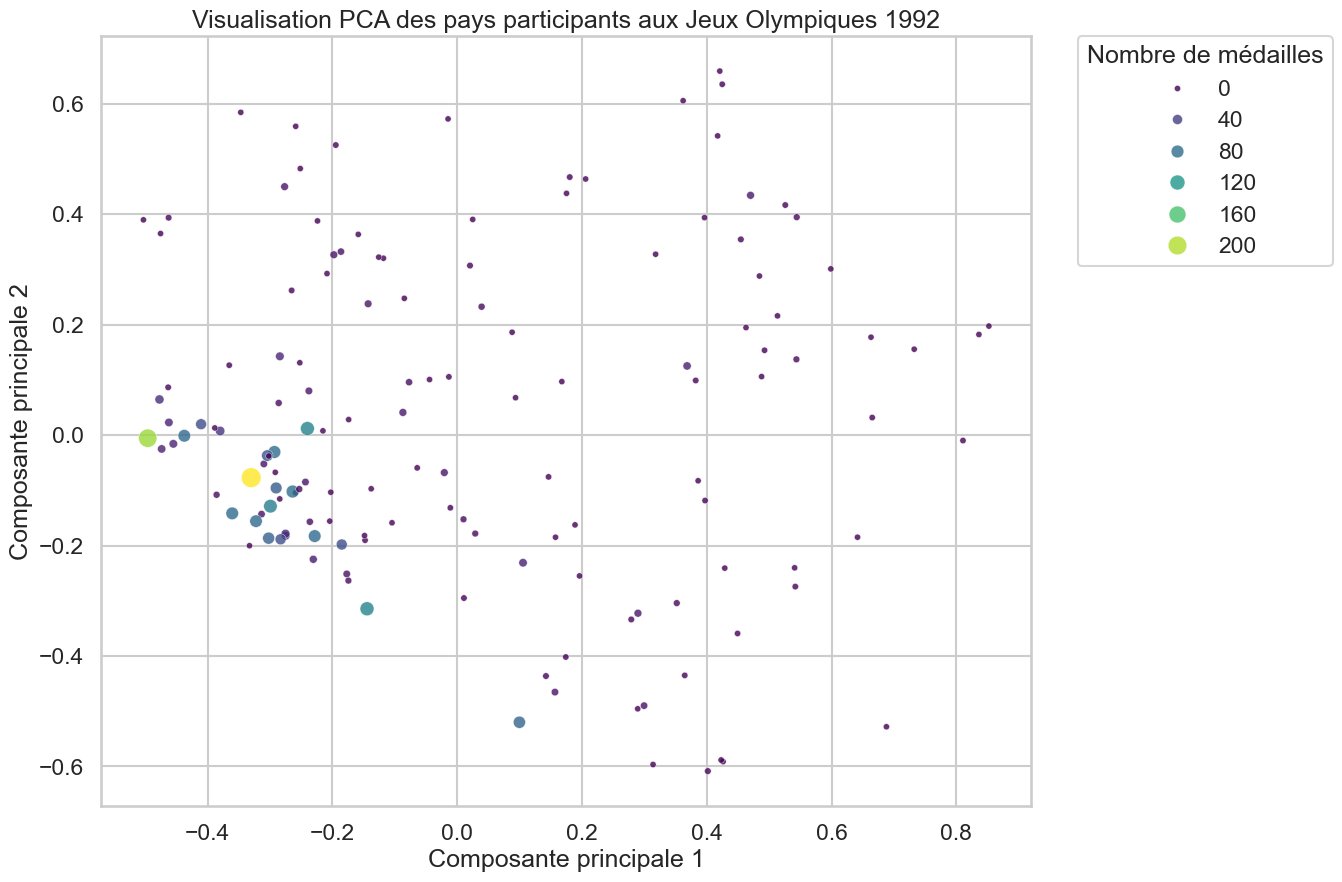

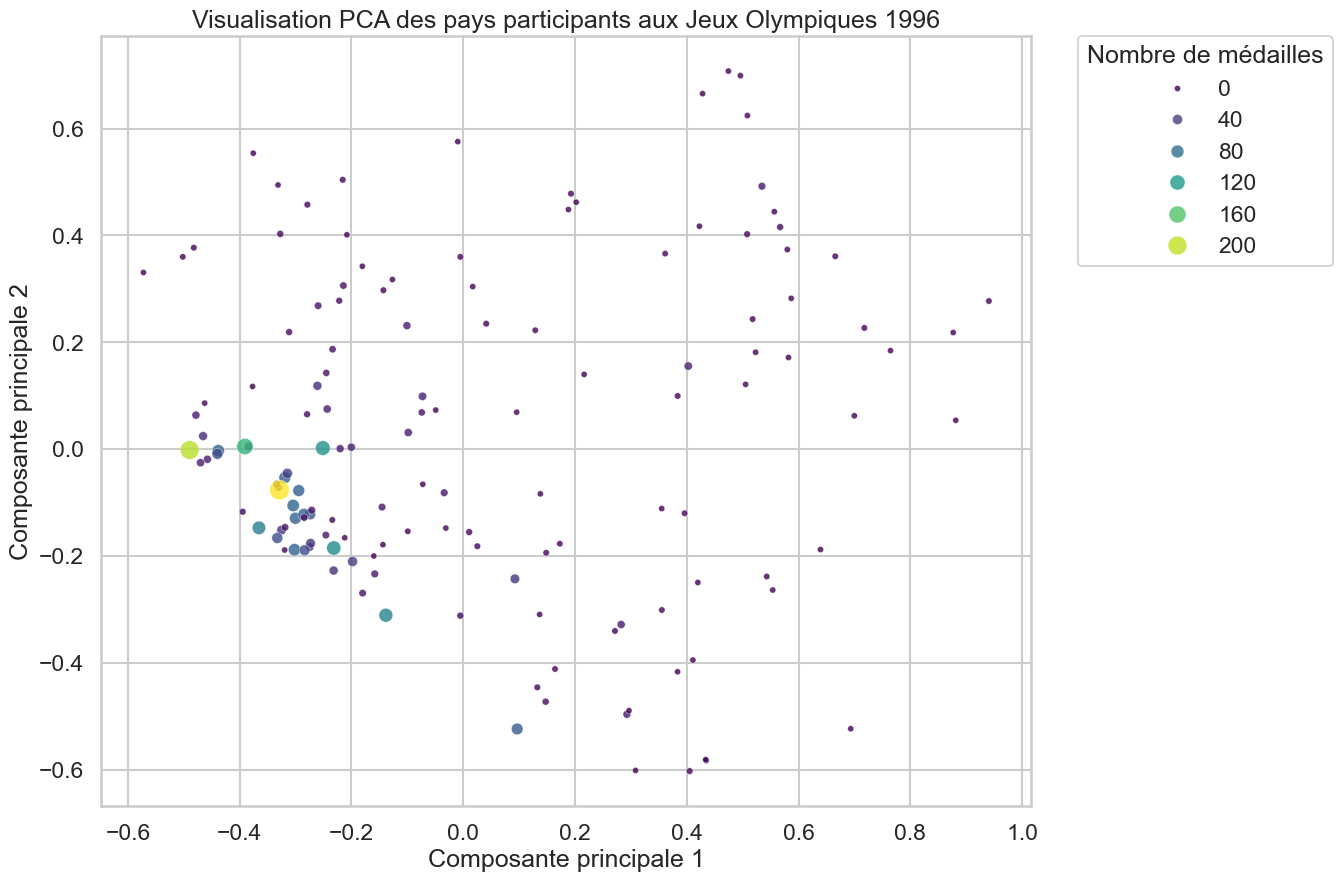

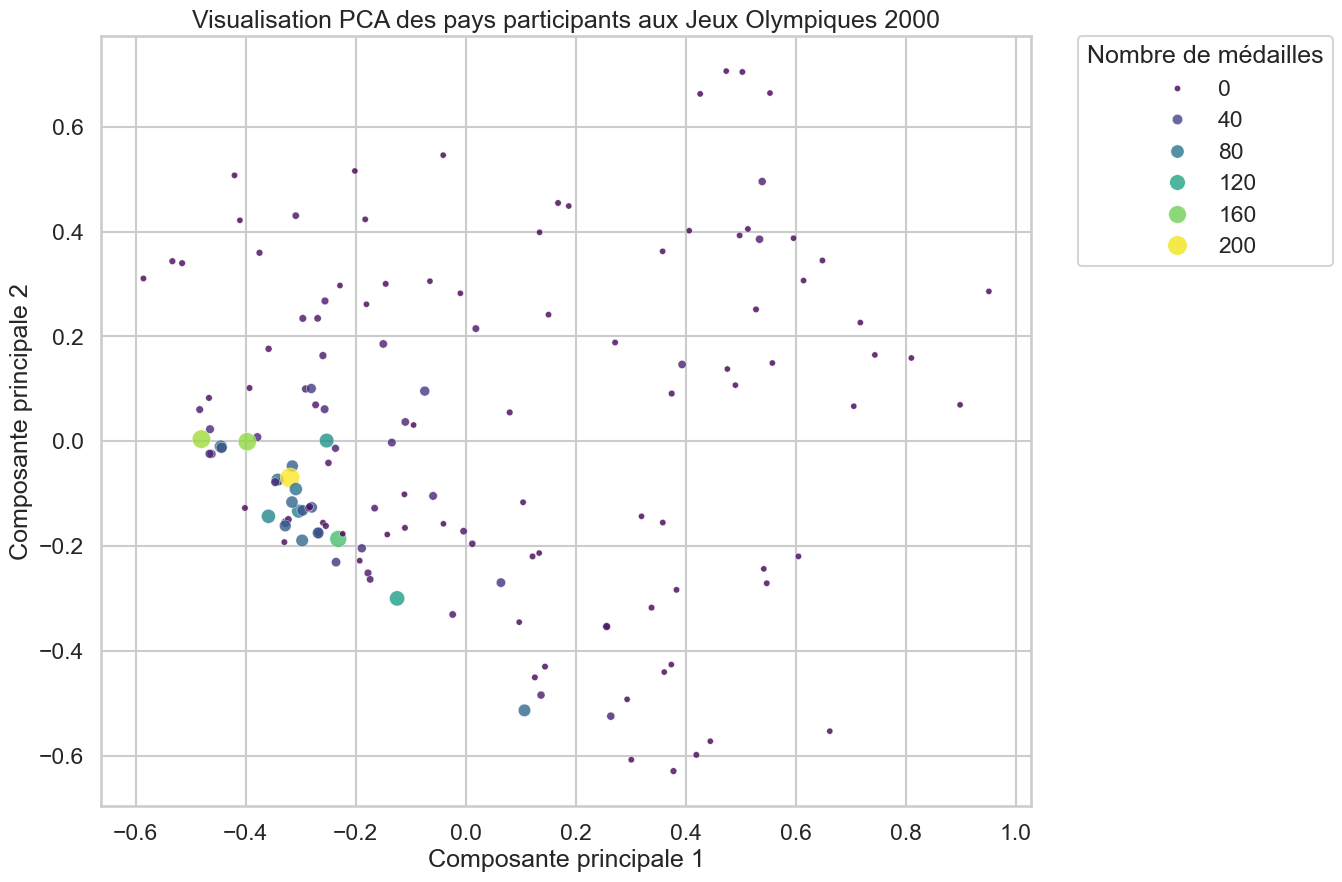

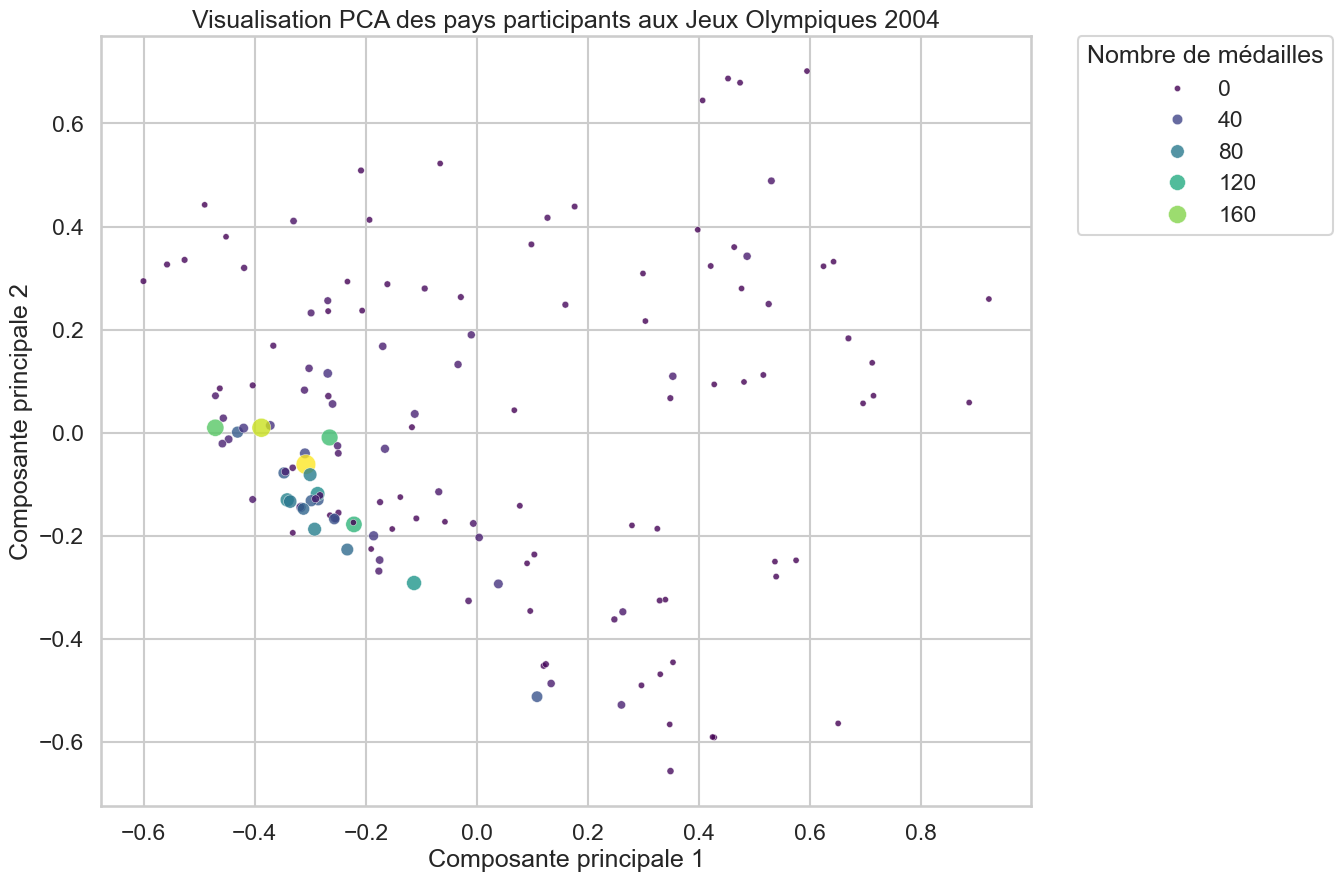

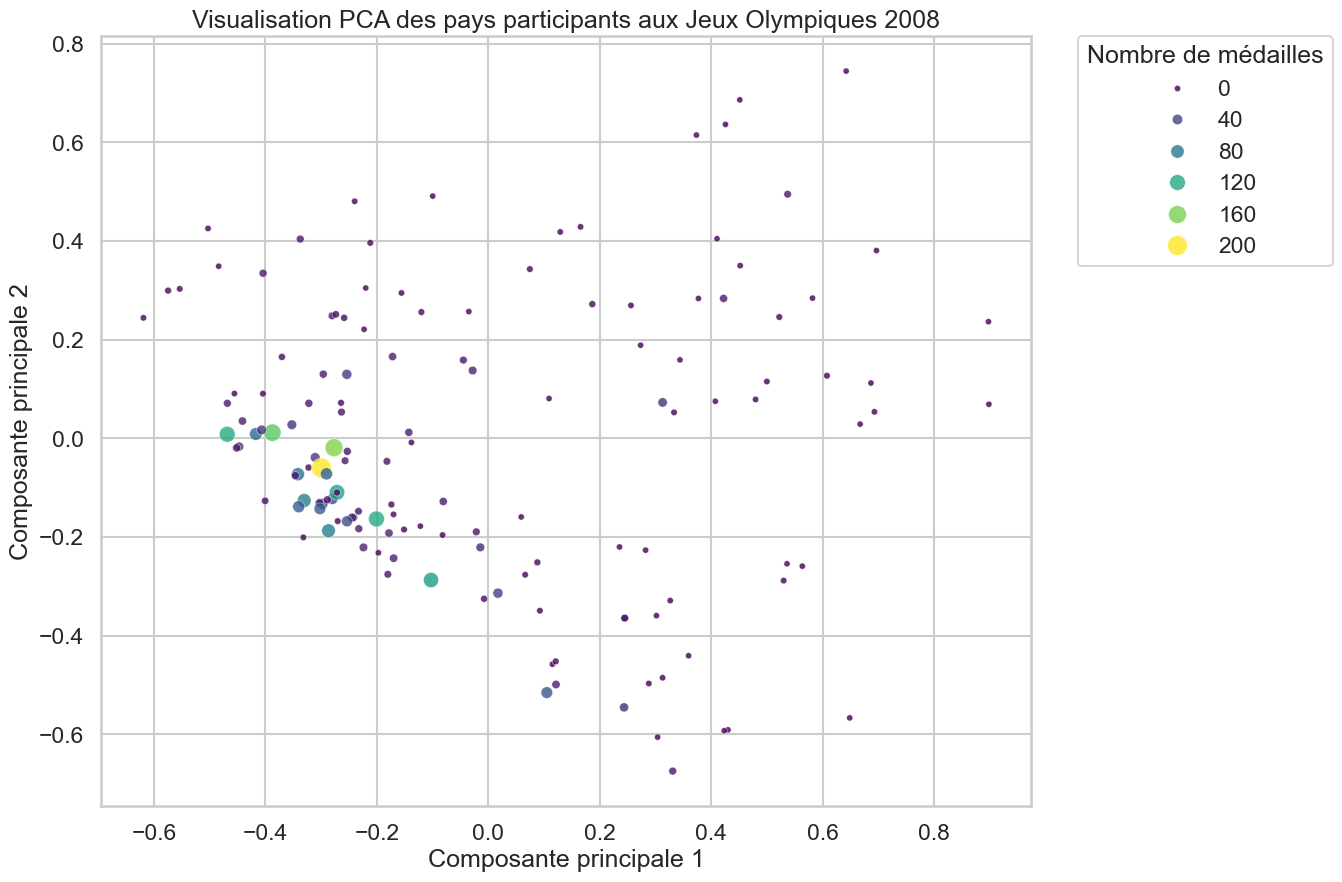

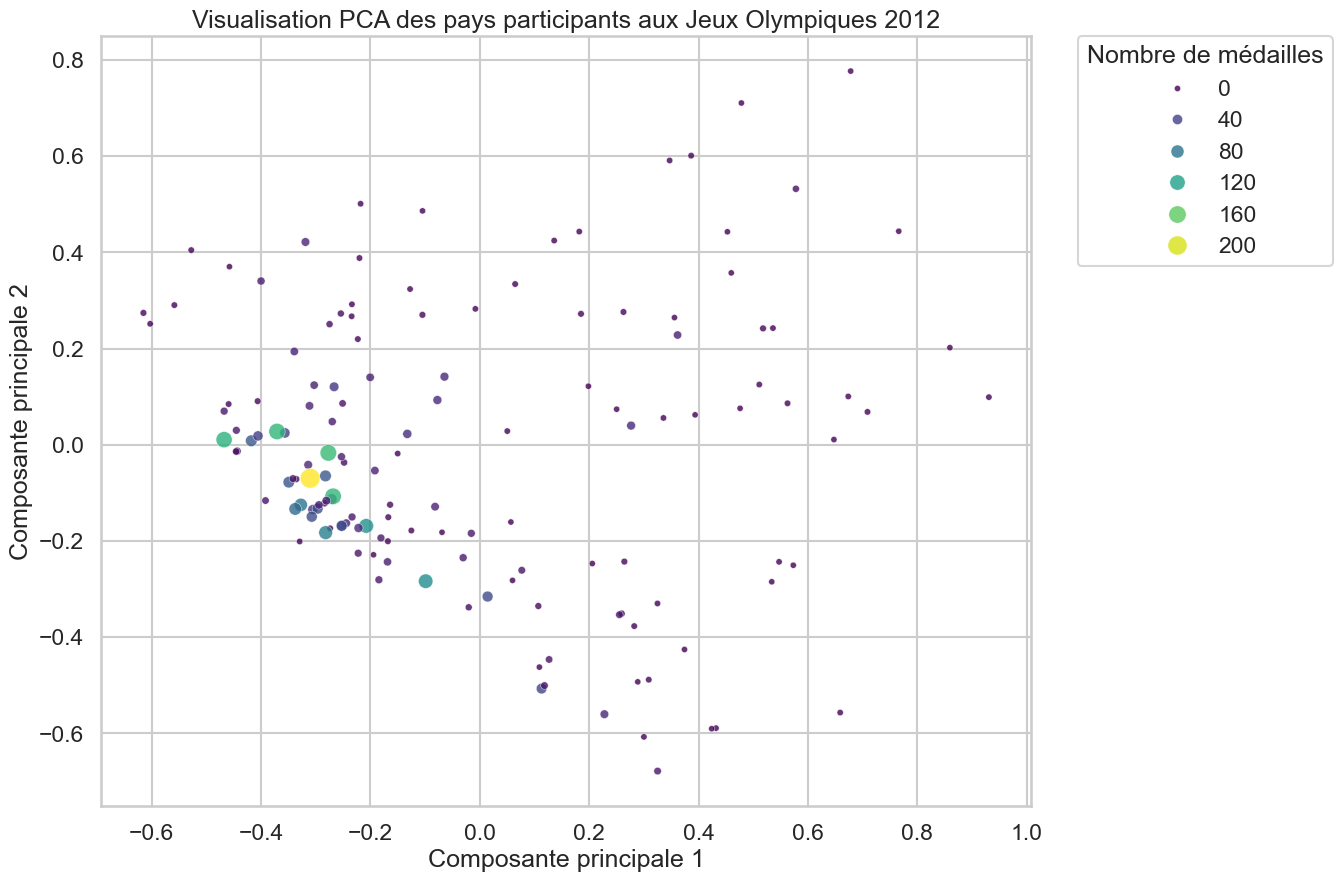

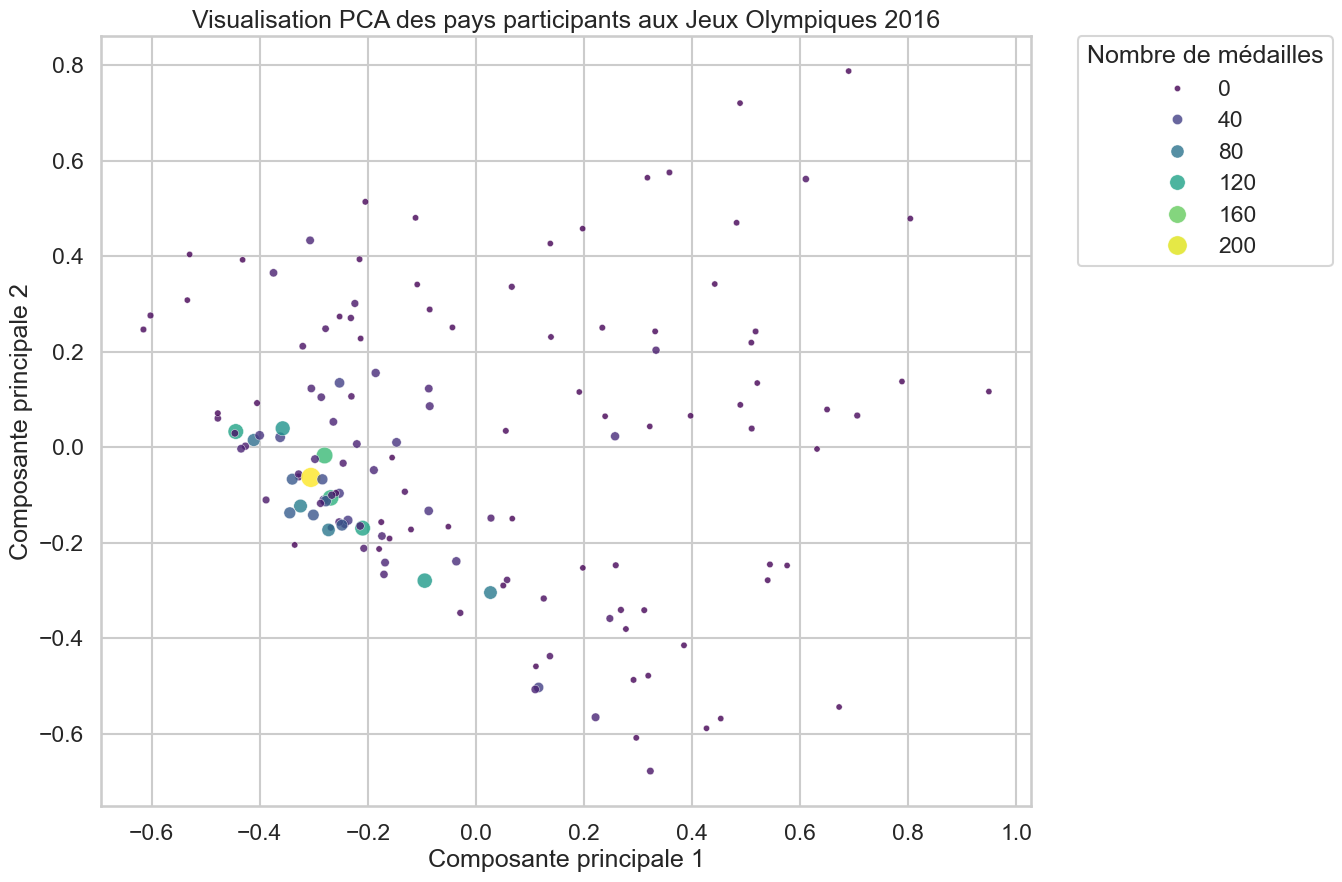

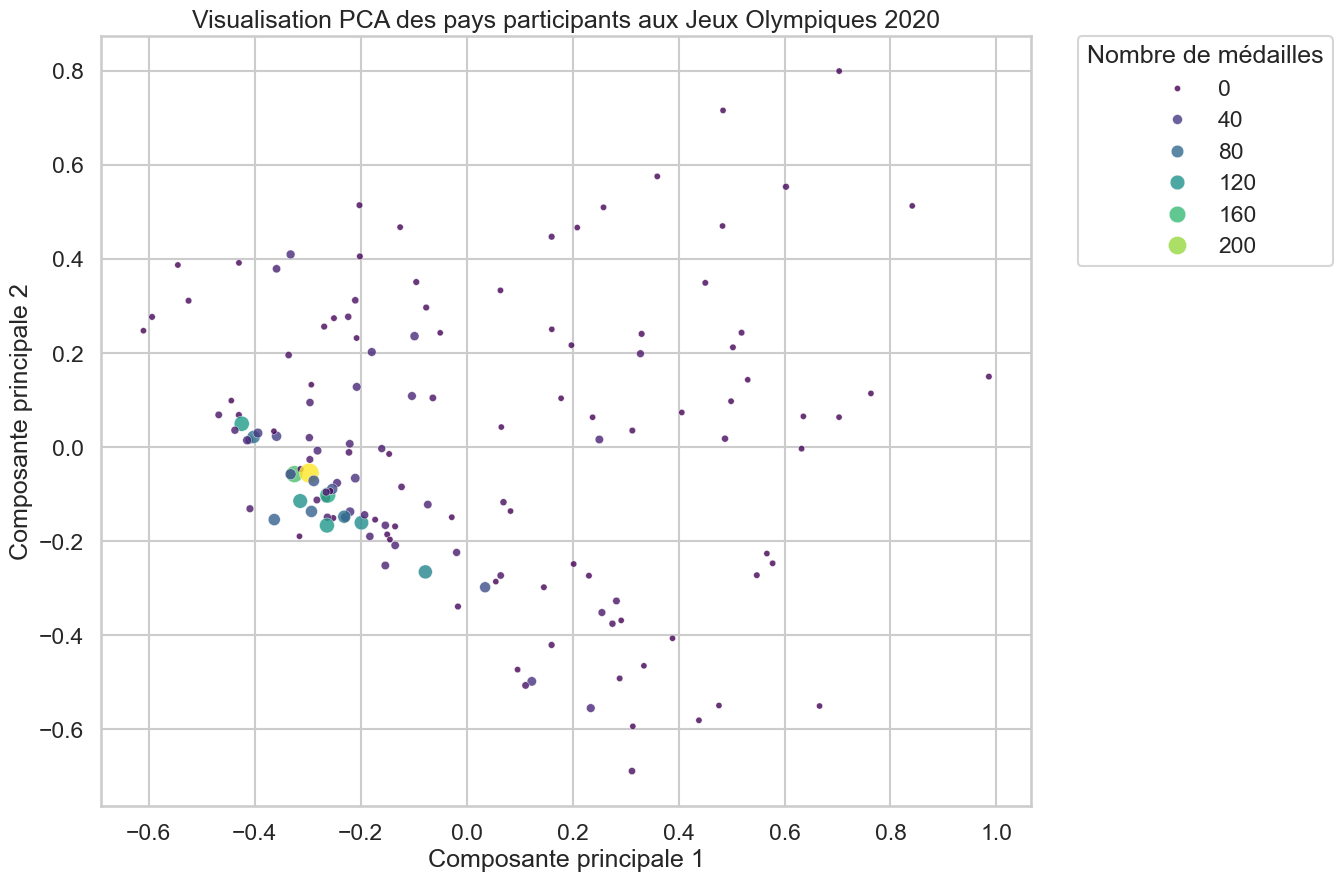

In [126]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Appliquer PCA pour réduire à 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Ajouter les composantes PCA au DataFrame
final_df["PCA1"] = X_pca[:, 0]
final_df["PCA2"] = X_pca[:, 1]

# Palette de couleurs pour améliorer la lisibilité
sns.set(style="whitegrid", context="talk")

# Affichage séparé par année
unique_years = final_df["year"].unique()

for year in unique_years:
    # Filtrer les données pour l'année en cours
    year_df = final_df[final_df["year"] == year]

    # Visualisation avec sns.scatterplot
    plt.figure(figsize=(12, 10))
    scatter = sns.scatterplot(
        x="PCA1",
        y="PCA2",
        hue="medals",
        size="medals",  # Taille des points en fonction du nombre de médailles
        sizes=(20, 200),  # Min et max pour la taille des points
        palette="viridis",
        alpha=0.8,
        data=year_df
    )
    plt.title(f"Visualisation PCA des pays participants aux Jeux Olympiques {year}")
    plt.xlabel("Composante principale 1")
    plt.ylabel("Composante principale 2")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Nombre de médailles")
    plt.show()


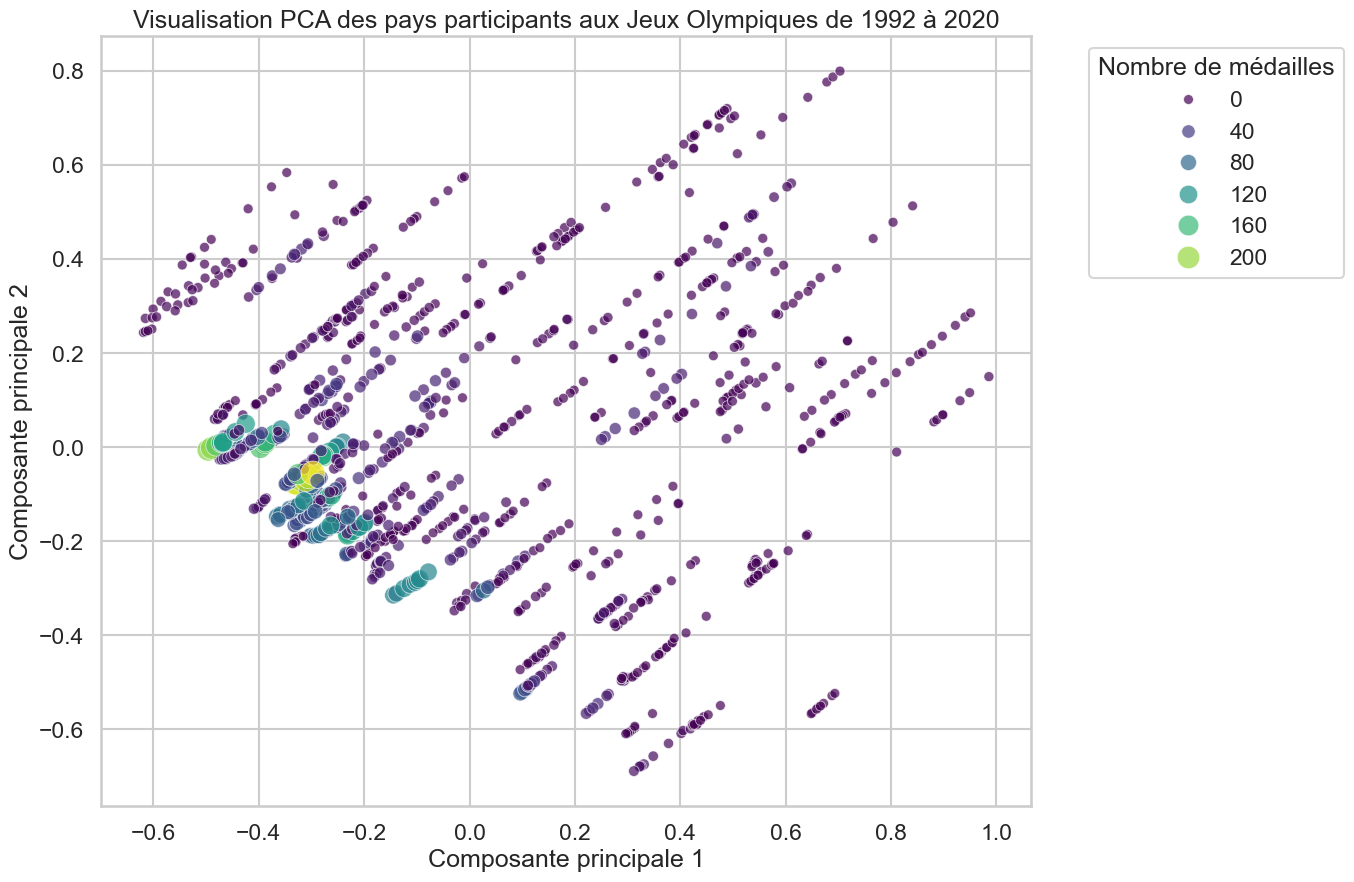

In [131]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Appliquer PCA pour réduire à 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Ajouter les composantes PCA au DataFrame
final_df["PCA1"] = X_pca[:, 0]
final_df["PCA2"] = X_pca[:, 1]

# Palette de couleurs pour améliorer la lisibilité
sns.set(style="whitegrid", context="talk")

# Visualisation avec seaborn
plt.figure(figsize=(12, 10))
scatter = sns.scatterplot(
    x="PCA1",
    y="PCA2",
    hue="medals",  # Couleur en fonction du nombre de médailles
    size="medals",  # Taille des points en fonction du nombre de médailles
    sizes=(50, 300),  # Taille minimale et maximale des points
    palette="viridis",
    alpha=0.7,
    data=final_df
)

# Ajout d'une légende et de la barre de couleur
plt.title("Visualisation PCA des pays participants aux Jeux Olympiques de 1992 à 2020")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Nombre de médailles")
cbar.set_label("Nombre de médailles")
plt.show()


In [135]:
import plotly.express as px
from sklearn.decomposition import PCA

# Appliquer PCA pour réduire à 2 dimensions
pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X)

# Ajouter les composantes PCA au DataFrame
final_df["PCA1"] = X_pca_2d[:, 0]
final_df["PCA2"] = X_pca_2d[:, 1]

# Visualisation interactive en 2D avec Plotly
fig = px.scatter(
    final_df,
    x="PCA1",
    y="PCA2",
    color="medals",  # Coloration par nombre de médailles
    hover_name="country",  # Affiche le nom du pays en survol
    title="Visualisation PCA 2D des pays participants aux Jeux Olympiques",
    labels={"PCA1": "Composante principale 1", "PCA2": "Composante principale 2"},
    color_continuous_scale="viridis",  # Palette de couleurs viridis
    opacity=0.7  # Transparence des points
)

# Affichage interactif
fig.show()


In [150]:
import plotly.express as px
from sklearn.decomposition import PCA

# Appliquer PCA pour réduire à 2 dimensions
pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X)

# Ajouter les composantes PCA au DataFrame
final_df["PCA1"] = X_pca_2d[:, 0]
final_df["PCA2"] = X_pca_2d[:, 1]

# Filtrer le DataFrame pour l'année courante (garder un DataFrame complet)
year_df = final_df.copy()

# Ajouter une taille minimale pour les points (médailles 0 -> petite taille)
year_df["size_medals"] = year_df["medals"].apply(lambda x: max(x, 10))  # Min 10 pour éviter taille nulle

# Visualisation interactive en 2D avec Plotly
fig = px.scatter(
    year_df,
    x="PCA1",
    y="PCA2",
    color="medals",  # Couleur par nombre de médailles
    size="size_medals",  # Taille des points par nombre de médailles (avec taille minimale)
    size_max=15,  # Taille maximale des points
    hover_name="country",  # Affiche le nom du pays en survol
    hover_data={"year": True, "medals": True},  # Affiche l'année et les médailles sur le hover
    animation_frame="year",  # Ajout de l'animation par année
    title="Visualisation PCA 2D des pays participants aux Jeux Olympiques par année",
    labels={"PCA1": "Composante principale 1", "PCA2": "Composante principale 2"},
    color_continuous_scale="viridis",  # Palette de couleurs
    opacity=0.7  # Transparence des points
)

# Affichage interactif
fig.show()


In [147]:
import plotly.express as px
from sklearn.decomposition import PCA

# Appliquer PCA pour réduire à 2 dimensions
pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X)

# Ajouter les composantes PCA au DataFrame
final_df["PCA1"] = X_pca_2d[:, 0]
final_df["PCA2"] = X_pca_2d[:, 1]

# Liste des années uniques
unique_years = final_df["year"].unique()

# Visualisation interactive par année
for year in unique_years:
    # Filtrer le DataFrame pour l'année courante
    year_df = final_df[final_df["year"] == year].copy()

    # Ajouter une taille minimale pour les points (médaille 0 -> petite taille)
    year_df["size_medals"] = year_df["medals"].apply(lambda x: max(x, 10))  # Min 1 pour éviter taille nulle

    # Visualisation interactive en 2D avec Plotly
    fig = px.scatter(
        year_df,
        x="PCA1",
        y="PCA2",
        color="medals",  # Coloration par nombre de médailles
        size="size_medals",  # Taille des points proportionnelle aux médailles avec min size = 1
        size_max=15,  # Taille maximale des points
        hover_name="country",  # Affiche le nom du pays en survol
        hover_data={"medals": True, "year": False},  # Affiche le nombre de médailles
        title=f"Visualisation PCA 2D des pays participants aux Jeux Olympiques {year}",
        labels={"PCA1": "Composante principale 1", "PCA2": "Composante principale 2"},
        color_continuous_scale="viridis",  # Palette de couleurs viridis
        opacity=0.7  # Transparence des points
    )

    # Affichage interactif
    fig.show()


In [156]:
import plotly.express as px
from sklearn.decomposition import PCA

# Appliquer PCA pour réduire à 3 dimensions
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X)

# Ajouter les composantes principales au DataFrame
final_df["PCA1"] = X_pca_3d[:, 0]
final_df["PCA2"] = X_pca_3d[:, 1]
final_df["PCA3"] = X_pca_3d[:, 2]

# Ajout d'une taille minimale pour les points (médailles 0 -> petite taille)
final_df["size_medals"] = final_df["medals"].apply(lambda x: max(x, 10))  # Taille minimale pour éviter des points invisibles

# Visualisation interactive en 3D avec animation par année
fig = px.scatter_3d(
    final_df,
    x="PCA1",
    y="PCA2",
    z="PCA3",
    color="medals",  # Couleur par nombre de médailles
    size="size_medals",  # Taille des points par nombre de médailles
    size_max=30,  # Taille maximale des points
    hover_name="country",  # Nom des pays affiché au survol
    hover_data={"year": True, "medals": True},  # Affiche l'année et le nombre de médailles
    animation_frame="year",  # Animation sur l'année
    title="Évolution PCA 3D des pays participants aux Jeux Olympiques par année",
    labels={
        "PCA1": "Composante principale 1",
        "PCA2": "Composante principale 2",
        "PCA3": "Composante principale 3",
    },
    color_continuous_scale="viridis",  # Palette de couleurs viridis
    opacity=0.7  # Transparence des points
)

# Affichage interactif
fig.show()


# UMAP

In [169]:
import umap.umap_ as umap  # Importer UMAP
import plotly.express as px

# Appliquer UMAP pour réduire à 2 dimensions
umap_2d = umap.UMAP(n_components=2, n_neighbors=20, min_dist=0.2, random_state=42)
X_umap_2d = umap_2d.fit_transform(X)

# Ajouter les composantes UMAP au DataFrame
final_df["UMAP1"] = X_umap_2d[:, 0]
final_df["UMAP2"] = X_umap_2d[:, 1]

# Ajout d'une taille minimale pour les points
final_df["size_medals"] = final_df["medals"].apply(lambda x: max(x, 10))  # Taille minimale pour éviter des points invisibles

# Visualisation interactive en 2D avec Plotly
fig = px.scatter(
    final_df,
    x="UMAP1",
    y="UMAP2",
    color="medals",  # Couleur par nombre de médailles
    size="size_medals",  # Taille des points proportionnelle au nombre de médailles
    size_max=20,  # Taille maximale des points
    hover_name="country",  # Nom des pays affiché en survol
    hover_data={"year": True, "medals": True},  # Affiche l'année et les médailles
    animation_frame="year",  # Animation par année
    title="Visualisation UMAP 2D des pays participants aux Jeux Olympiques par année",
    labels={"UMAP1": "Composante UMAP 1", "UMAP2": "Composante UMAP 2"},
    color_continuous_scale="viridis",  # Palette de couleurs perceptuelle uniforme
    opacity=0.7  # Transparence des points
)

# Affichage interactif
fig.show()


c:\Users\crist\anaconda3\envs\pcd\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [172]:
import umap.umap_ as umap  # Importer UMAP
import plotly.express as px

# Appliquer UMAP pour réduire à 3 dimensions
umap_3d = umap.UMAP(n_components=3, n_neighbors=20, min_dist=0.2, random_state=42)
X_umap_3d = umap_3d.fit_transform(X)

# Ajouter les composantes UMAP au DataFrame
final_df["UMAP1"] = X_umap_3d[:, 0]
final_df["UMAP2"] = X_umap_3d[:, 1]
final_df["UMAP3"] = X_umap_3d[:, 2]

# Ajout d'une taille minimale pour les points (médailles 0 -> petite taille)
final_df["size_medals"] = final_df["medals"].apply(lambda x: max(x, 10))  # Taille minimale pour éviter des points invisibles

# Visualisation interactive en 3D avec animation par année
fig = px.scatter_3d(
    final_df,
    x="UMAP1",
    y="UMAP2",
    z="UMAP3",
    color="medals",  # Couleur par nombre de médailles
    size="size_medals",  # Taille des points par nombre de médailles
    size_max=30,  # Taille maximale des points
    hover_name="country",  # Nom des pays affiché en survol
    hover_data={"year": True, "medals": True},  # Affiche l'année et le nombre de médailles
    animation_frame="year",  # Animation par année
    title="Évolution UMAP 3D des pays participants aux Jeux Olympiques par année",
    labels={
        "UMAP1": "Composante UMAP 1",
        "UMAP2": "Composante UMAP 2",
        "UMAP3": "Composante UMAP 3",
    },
    color_continuous_scale="viridis",  # Palette de couleurs perceptuelle uniforme
    opacity=0.7  # Transparence des points
)

# Affichage interactif
fig.show()


c:\Users\crist\anaconda3\envs\pcd\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



# Random Forest (XGBoost)

In [191]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Séparer les données pour l'entraînement et le test
train_df = final_df[final_df["year"] < 2020].copy()  # Copie explicite
test_df = final_df[final_df["year"] == 2020].copy()  # Copie explicite

# Variables explicatives (features) et cible (target)
features = ['pop', 'fertility', 'child', 'capita', 'Avg_Temperature', 'Avg_Precipitation', 'Avg_Seasonality', 'Avg_Aridity']
target = "medals"

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# Entraînement du modèle Random Forest Regressor
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

# Entraînement du modèle XGBoost Regressor
xgb = XGBRegressor(n_estimators=200, random_state=42)
xgb.fit(X_train, y_train)
xgb_predictions = xgb.predict(X_test)

# Calcul du RMSE pour Random Forest
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))

# Calcul du RMSE pour XGBoost
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))

# Afficher les résultats
print(f"RMSE pour Random Forest sur l'année 2020 : {rf_rmse:.4f}")
print(f"RMSE pour XGBoost sur l'année 2020 : {xgb_rmse:.4f}")

# Ajouter les prédictions aux données de test pour visualisation
test_df.loc[:, "rf_predictions"] = rf_predictions  # Utilisation de .loc pour modifier la colonne
test_df.loc[:, "xgb_predictions"] = xgb_predictions  # Utilisation de .loc pour modifier la colonne

# Affichage des premières lignes des résultats
print(test_df[["country", "year", "medals", "rf_predictions", "xgb_predictions"]])


RMSE pour Random Forest sur l'année 2020 : 15.4857
RMSE pour XGBoost sur l'année 2020 : 15.3882
         country  year  medals  rf_predictions  xgb_predictions
1001     Albania  2020     2.0           4.715         5.122979
1002     Algeria  2020     9.0          10.420        10.708930
1003      Angola  2020     1.0           3.345         5.240013
1004   Argentina  2020    17.0          48.760        44.890705
1005     Armenia  2020     9.0          14.635        21.269703
...          ...   ...     ...             ...              ...
1139  Uzbekistan  2020    29.0          13.845        16.552280
1140   Venezuela  2020     7.0           8.745        11.998327
1141     Vietnam  2020     2.0           6.265         5.529913
1142      Zambia  2020     4.0           0.755         0.992839
1143    Zimbabwe  2020     0.0           1.560         1.709837

[143 rows x 5 columns]


In [193]:
from sklearn.metrics import r2_score

# Exemple :
r2_rf = r2_score(y_test, rf_predictions)  # R² pour Random Forest
r2_xgb = r2_score(y_test, xgb_predictions)  # R² pour XGBoost

print(f"R² pour Random Forest : {r2_rf:.4f}")
print(f"R² pour XGBoost : {r2_xgb:.4f}")

R² pour Random Forest : 0.8136
R² pour XGBoost : 0.8159


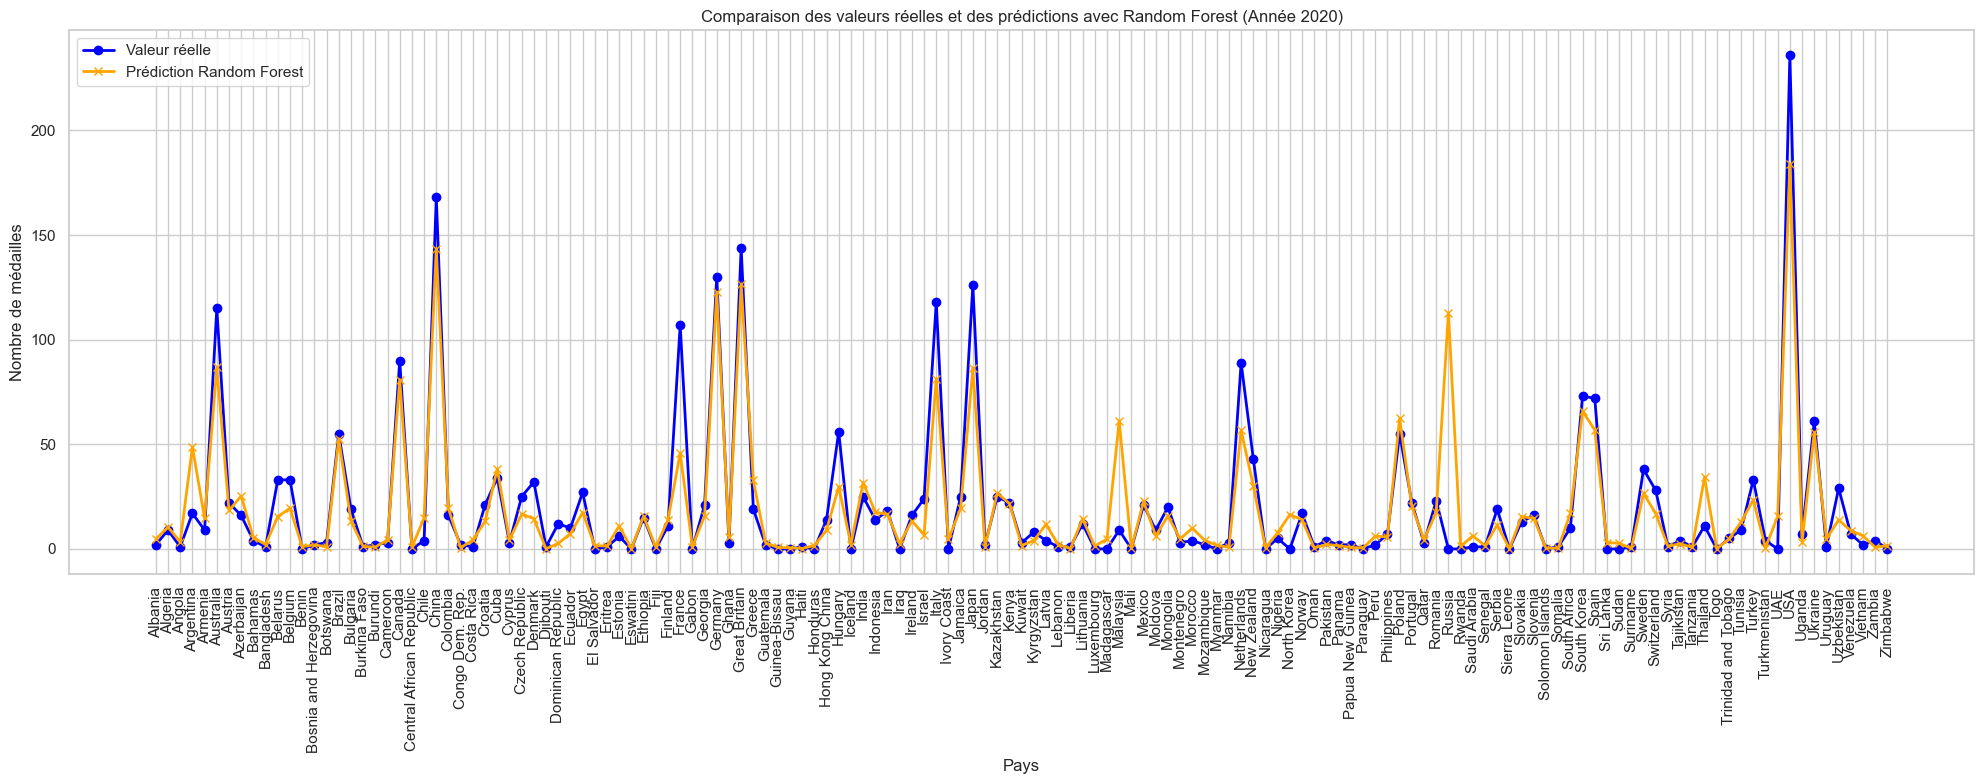

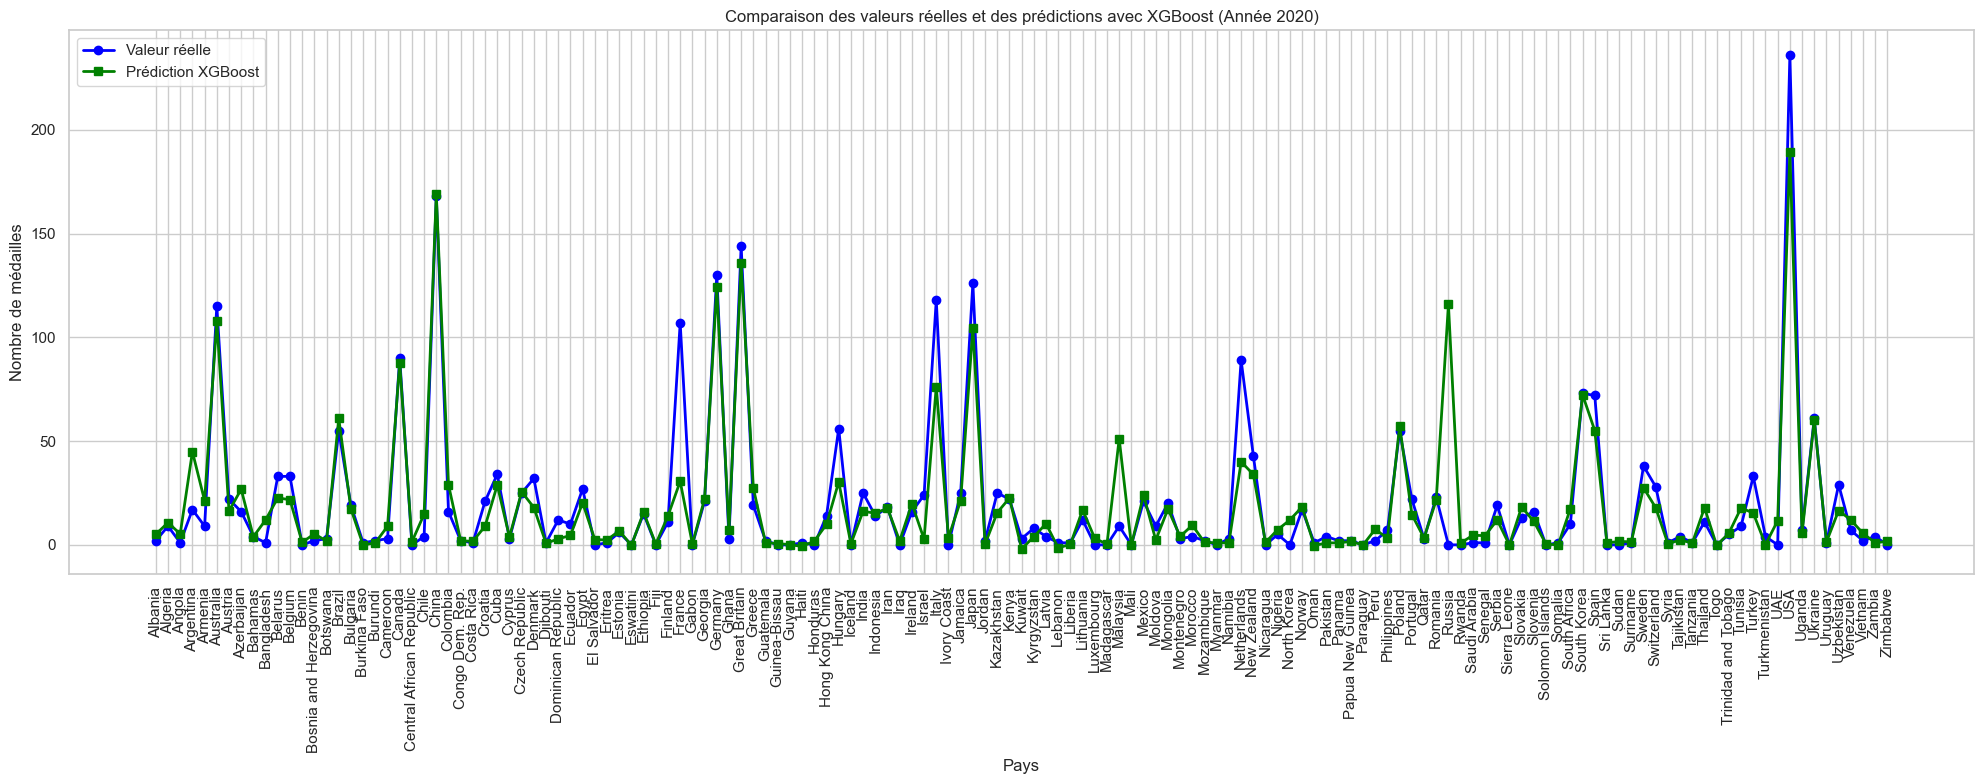

In [204]:
# Comparaison visuelle des valeurs réelles et prédictions Random Forest
plt.figure(figsize=(20, 8))
plt.plot(test_df["country"], test_df["medals"], label="Valeur réelle", marker='o', color='blue', linewidth=2)
plt.plot(test_df["country"], test_df["rf_predictions"], label="Prédiction Random Forest", marker='x', color='orange', linewidth=2)
plt.xticks(rotation=90)
plt.xlabel("Pays")
plt.ylabel("Nombre de médailles")
plt.title("Comparaison des valeurs réelles et des prédictions avec Random Forest (Année 2020)")
plt.legend()
plt.tight_layout()
plt.show()

# Comparaison visuelle des valeurs réelles et prédictions XGBoost
plt.figure(figsize=(20, 8))
plt.plot(test_df["country"], test_df["medals"], label="Valeur réelle", marker='o', color='blue', linewidth=2)
plt.plot(test_df["country"], test_df["xgb_predictions"], label="Prédiction XGBoost", marker='s', color='green', linewidth=2)
plt.xticks(rotation=90)
plt.xlabel("Pays")
plt.ylabel("Nombre de médailles")
plt.title("Comparaison des valeurs réelles et des prédictions avec XGBoost (Année 2020)")
plt.legend()
plt.tight_layout()
plt.show()



In [181]:
# Visualisation des prédiction pour Random Forest

import plotly.express as px

# Visualisation des prédictions pour Random Forest

fig = px.scatter(
    test_df,
    x="medals",
    y="rf_predictions",
    color="medals",
    hover_name="country",
    title="Prédictions Random Forest vs. Médailles réelles en 2020",
    labels={"medals": "Médailles réelles", "rf_predictions": "Prédictions RF"},
    color_continuous_scale="viridis",
    opacity=0.7
)

# Affichage de la droite d'identité (prédictions parfaites)
fig.add_shape(
    type="line", line=dict(dash="dash"),
    x0=test_df["medals"].min(), y0=test_df["medals"].min(),
    x1=test_df["medals"].max(), y1=test_df["medals"].max()
)

# Affichage interactif
fig.show()

In [182]:
# Visualisation des prédictions pour XGBoost

fig = px.scatter(
    test_df,
    x="medals",
    y="xgb_predictions",
    color="medals",
    hover_name="country",
    title="Prédictions XGBOOST vs. Médailles réelles en 2020",
    labels={"medals": "Médailles réelles", "xgb_predictions": "Prédictions XGBoost"},
    color_continuous_scale="viridis",
    opacity=0.7
)

# Affichage de la droite d'identité (prédictions parfaites)
fig.add_shape(
    type="line", line=dict(dash="dash"),
    x0=test_df["medals"].min(), y0=test_df["medals"].min(),
    x1=test_df["medals"].max(), y1=test_df["medals"].max()
)

# Affichage interactif

fig.show()